# Pancard Tempering Detection

In [6]:

from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [7]:
mkdir pancard_tempering

In [8]:
mkdir pancard_tempering/image

Display image

In [9]:
original=Image.open(requests.get("https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg",stream=True).raw)
tampered=Image.open(requests.get("https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png",stream=True).raw) 

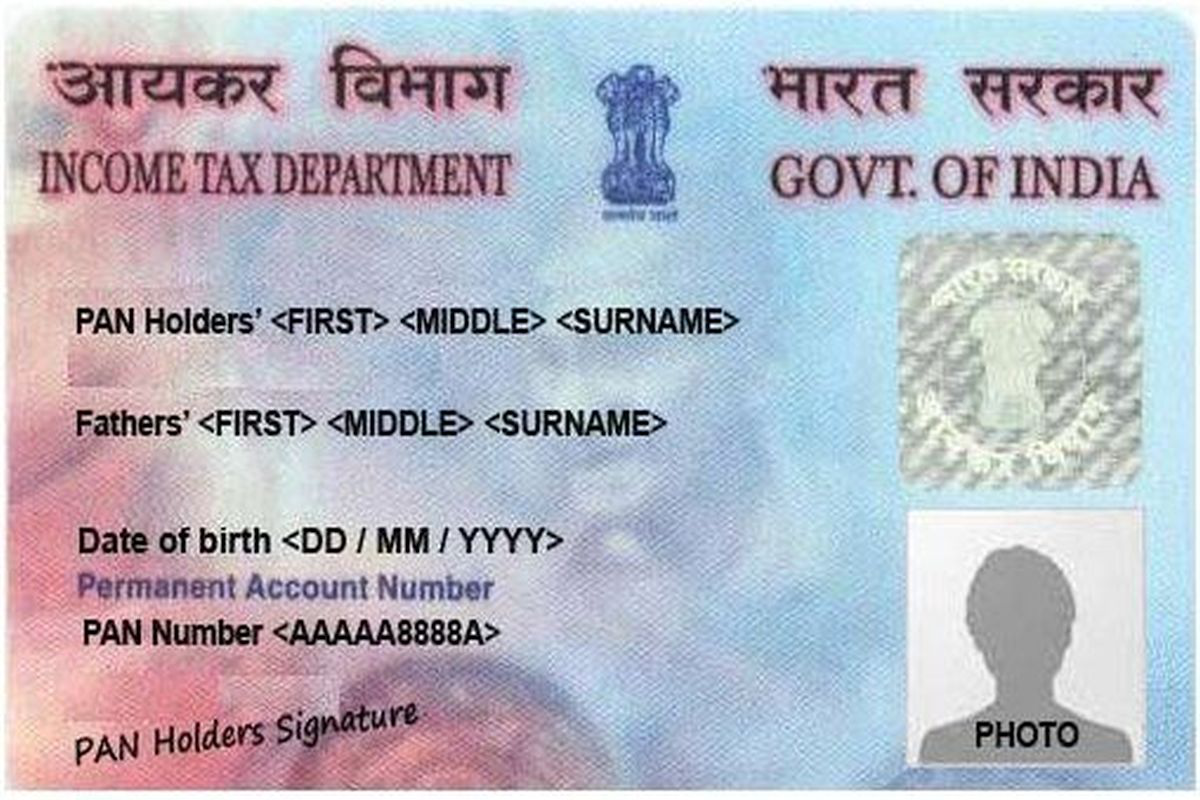

In [12]:
original

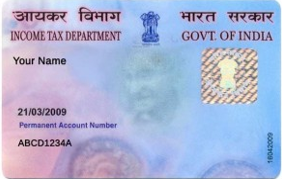

In [13]:
tampered

Checking format,size of original and user images

In [15]:
print(original.format)
print(tampered.format)
print(original.size)
print(tampered.size)



JPEG
PNG
(1200, 800)
(282, 179)


Changing Sizes of image to match

In [19]:
original = original.resize((250, 160))
print(original.size)
original.save('/content/pancard_tempering/image/original.png') #Save image
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('/content/pancard_tempering/image/tampered.png')

(250, 160)
(250, 160)


In [26]:
tampered=Image.open("/content/pancard_tempering/image/tampered.png")
tampered.save('/content/pancard_tempering/image/tampered.png')


Uploading to CV

In [41]:

original = cv2.imread('/content/pancard_tempering/image/original.png')
tampered = cv2.imread('/content/pancard_tempering/image/tampered.png')

Converting to grayscale as machine can understand grayscaled image better because of only 1 channel

In [43]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

we can find the difference between both images with the structural_similarity library - The lower the SSIM score lower is the similarity.

In [49]:
(score,diff) = structural_similarity(original_gray,tampered_gray,full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31678790332739426


#### Here we are using the threshold function of computer vision which applies an adaptive threshold to the image which is stored in the form array. This function transforms the grayscale image into a binary image using a mathematical formula.
#### Find contours works on binary image and retrive the contours. This contours are a useful tool for shape analysis and recoginition. Grab contours grabs the appropriate value of the contours.

In [52]:
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [53]:
for c in cnts:
    # applying contours on image
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(tampered, (x, y), (x + w, y + h), (0, 0, 255), 2)

original image


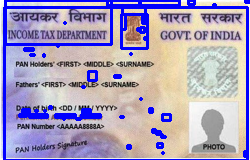

In [55]:
print('original image')
Image.fromarray(original)

original image


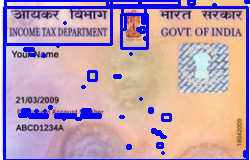

In [56]:
print('original image')
Image.fromarray(tampered)

different image


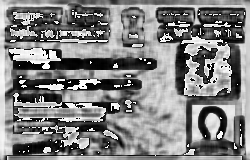

In [57]:
print('different image')
Image.fromarray(diff)

threshold image


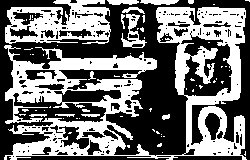

In [58]:
print('threshold image')
Image.fromarray(thresh)

our SSIM is ~31.2% we can say that the image user provided is fake or tampered.
We also visualized the differences and similarities between the images using by displaying the images with contours, difference and threshold.